In [20]:
from google.colab import files
uploaded = files.upload()

Saving Customer-Churn-Prediction.csv to Customer-Churn-Prediction (1).csv


In [83]:
import pandas as pd

df = pd.read_csv('Customer-Churn-Prediction.csv')
df.head(10)   # See first few rows

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   
6               Yes     Fiber optic             No          Yes   
7  No phone service             DSL            Yes           No   
8               Yes     Fiber optic             No           No   
9                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   
6               No          No         Yes              No  Month-to-month   
7               No          No          No              No  Month-to-month   
8              Yes         Yes         Yes             Yes  Month-to-month   
9               No          No          No              No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   
5              Yes           Electronic check           99.65        820.5   
6              Yes    Credit card (automatic)           89.10       1949.4   
7               No               Mailed check           29.75        301.9   
8              Yes           Electronic check          104.80      3046.05   
9               No  Bank transfer (automatic)           56.15      3487.95   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes  
5   Yes  
6    No  
7    No  
8   Yes  
9    No

In [84]:
df.columns           # View all column names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [85]:
df.info()             # Check data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
'''21 columns. Based on the dtypes:

    1.Categorical columns (need encoding):
        gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup,
        DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn

    2. Numerical columns (no encoding needed):
        SeniorCitizen, tenure, MonthlyCharges

    3.Special columns:

    TotalCharges ‚Üí Looks numeric but it's of type object, so we'll convert it.

    customerID ‚Üí Just an identifier, can be dropped.

'''

In [86]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [87]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No

In [88]:
df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [89]:
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')   # errors='coerce' means if any value can't be converted to a number, turn it into NaN (missing value)

In [90]:
# Have to see if there are unique values or not

non_numeic_columns = df.select_dtypes(include=['object','bool']).columns

for col in non_numeic_columns:
    unique = df[col].unique().tolist()
    print(f"{col} :  {unique}")

gender :  ['Female', 'Male']
Partner :  ['Yes', 'No']
Dependents :  ['No', 'Yes']
PhoneService :  ['No', 'Yes']
MultipleLines :  ['No phone service', 'No', 'Yes']
InternetService :  ['DSL', 'Fiber optic', 'No']
OnlineSecurity :  ['No', 'Yes', 'No internet service']
OnlineBackup :  ['Yes', 'No', 'No internet service']
DeviceProtection :  ['No', 'Yes', 'No internet service']
TechSupport :  ['No', 'Yes', 'No internet service']
StreamingTV :  ['No', 'Yes', 'No internet service']
StreamingMovies :  ['No', 'Yes', 'No internet service']
Contract :  ['Month-to-month', 'One year', 'Two year']
PaperlessBilling :  ['Yes', 'No']
PaymentMethod :  ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn :  ['No', 'Yes']


In [ ]:
# We got 10 columns with unique values

In [91]:
#  Encode Binary Categorical Columns with Label Encoding

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


In [93]:
# One-Hot Encoding for Multi-Class Columns

multi_class_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']     # Columns having unique values

# First, generate dummy columns for multi-class features
dummies = pd.get_dummies(df[multi_class_cols], prefix=multi_class_cols, dtype=int)

# Drop original multi-class categorical columns
df.drop(columns=multi_class_cols, inplace=True)

# Concatenate dummy columns to original DataFrame
df = pd.concat([df, dummies], axis=1)

In [94]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  MultipleLines_No  \
0                 1           29.85         29.85      0                 0   
1                 0           56.95       1889.50      0                 1   
2                 1           53.85        108.15      1                 1   
3                 0           42.30       1840.75      0                 0   
4                 1           70.70        151.65      1                 1   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                               1                  0                    1   
1                               0                  0                    1   
2                               0                  0                    1   
3                               1                  0                    1   
4                               0                  0                    0   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                            0                   0                  1   
1                            0                   0                  0   
2                            0                   0                  0   
3                            0                   0                  0   
4                            1                   0                  1   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                   0                   0                0   
1                                   0                   1                1   
2                                   0                   1                0   
3                                   0                   1                1   
4                                   0                   0                1   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
0                                 0                 1                    1   
1                                 0                 0                    0   
2                                 0                 1                    1   
3                                 0                 0                    0   
4                                 0                 0                    1   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                     0                     0               1   
1                                     0                     1               1   
2                                     0                     0               1   
3                                     0                     1               0   
4                                     0                     0               1   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                                0                0               1   
1                                0                0               1   
2                                0                0               1   
3                                0                1               1   
4                                0                0               1   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                                0                0                   1   
1                                0                0                   1   
2                                0                0                   1   
3                                0                0  

In [96]:
df.shape

(7043, 41)

In [97]:
# Handling NaN values of 'TotalCharges' column

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-97-64493bf53d4b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [98]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  MultipleLines_No  \
0                 1           29.85         29.85      0                 0   
1                 0           56.95       1889.50      0                 1   
2                 1           53.85        108.15      1                 1   
3                 0           42.30       1840.75      0                 0   
4                 1           70.70        151.65      1                 1   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                               1                  0                    1   
1                               0                  0                    1   
2                               0                  0                    1   
3                               1                  0                    1   
4                               0                  0                    0   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                            0                   0                  1   
1                            0                   0                  0   
2                            0                   0                  0   
3                            0                   0                  0   
4                            1                   0                  1   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                   0                   0                0   
1                                   0                   1                1   
2                                   0                   1                0   
3                                   0                   1                1   
4                                   0                   0                1   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
0                                 0                 1                    1   
1                                 0                 0                    0   
2                                 0                 1                    1   
3                                 0                 0                    0   
4                                 0                 0                    1   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                     0                     0               1   
1                                     0                     1               1   
2                                     0                     0               1   
3                                     0                     1               0   
4                                     0                     0               1   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                                0                0               1   
1                                0                0               1   
2                                0                0               1   
3                                0                1               1   
4                                0                0               1   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                                0                0                   1   
1                                0                0                   1   
2                                0                0                   1   
3                                0                0  

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [174]:
# Import all modules
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier     # Descision Tree
from sklearn.svm import SVC                             # Support vector classifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [111]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [126]:
# Splitting proccessed data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 52)

In [127]:
# LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy = lr.score(X_test,y_test)
print(f"Accuracy score of test data using LogisticRegression is {accuracy*100 : .2f}%")  # Taking upto 2 decimal

Accuracy score of test data using LogisticRegression is  81.40%


In [133]:
# Support vector classifier (SVC)

svm = SVC()
svm.fit(X_train, y_train)
accuracy = svm.score(X_test,y_test)
print(f"Accuracy score of test data using Support vector classifier is {accuracy*100 : .2f}%")

Accuracy score of test data using Support vector classifier is  73.12%


In [144]:
# RandomForestClassifier  (Descision Trees)

rf = RandomForestClassifier(n_estimators=200)   # This means the model will build 200 decision trees.
rf.fit(X_train, y_train)
accuracy = rf.score(X_test,y_test)
print(f"Accuracy score of test data using RandomForestClassifier is {accuracy*100 : .2f}%")

Accuracy score of test data using RandomForestClassifier is  79.22%


In [180]:
# Creating a Function that will directly provide me the accuracy score

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"The score of this model is {score*100 :.2f}%")
    # y_pred = model.predict(X_test)
    # print(y_pred)

In [181]:
get_score(LogisticRegression(),X_train, X_test, y_train, y_test)

The score of this model is 81.40%


In [151]:
get_score(SVC(),X_train, X_test, y_train, y_test)

The score of this model is 73.12%


In [153]:
get_score(RandomForestClassifier(n_estimators=50),X_train, X_test, y_train, y_test)

The score of this model is 78.56%


In [148]:
# Applying KFold

kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [165]:
# Cross Validations (In different Algorithms):

print('Here I will get all the cross validation scores in an array and see the accuracy score. Each number is the accuracy score for one fold')
print()
cross_val_score(LogisticRegression(), X, y, cv=kf)  # Here cv=kf means I am keeping KFold as my cross validation

Here I will get all the cross validation scores in an array and see the accuracy score. Each number is the accuracy score for one fold



array([0.80198722, 0.81263307, 0.79418027, 0.80539773, 0.80326705])

In [167]:
cross_val_score(SVC(), X, y ,cv=kf)

array([0.73527324, 0.74166075, 0.73740241, 0.72869318, 0.73011364])

In [168]:
cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=kf)

array([0.79630944, 0.78566359, 0.7707594 , 0.78977273, 0.79971591])

In [154]:
# Applying StratifiedKFold

fold = StratifiedKFold()
fold

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [171]:
# Cross Validation (StratifiedKFold) in different Algorithms

# Putting Stratified K Fold in cv which I have saved as fold previously

cross_val_score(LogisticRegression(), X, y, cv=fold)  # Here cv=fold means I am keeping StratifiedKFold as my cross validation

array([0.8012775 , 0.8105039 , 0.78779276, 0.81392045, 0.80539773])

In [172]:
cross_val_score(SVC(), X, y ,cv=fold)

array([0.73456352, 0.73456352, 0.73456352, 0.73508523, 0.734375  ])

In [173]:
cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=fold)

array([0.79488999, 0.79488999, 0.76933996, 0.79190341, 0.79261364])

In [186]:
y_pred = lr.predict(X_test)  # Here I'm choosing LogisticRegression's  to predict y

print(y_pred)



[1 0 0 ... 0 0 0]


In [187]:
# Creating confussion Matrix
#Then Create heatMap

cm = confusion_matrix(y_test, y_pred)
cm

array([[1389,  156],
       [ 237,  331]])

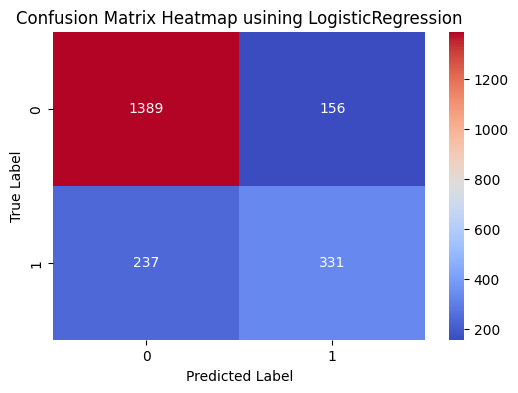

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')  #fmt = 'd' = decimal integer format (Letting to show all integer values)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap usining LogisticRegression')
plt.show()

üìå Insights:
‚úÖ Model is good at identifying customers who won't churn (1389 correct predictions).

‚ùå It misses many customers who will churn (237 false negatives).

‚ö†Ô∏è Precision is better than recall: So when the model says "churn", it‚Äôs often correct ‚Äî but it misses some churners.

Use Case Implication: In a churn prevention scenario, recall is important ‚Äî you want to catch as many churners as possible, even if it means a few false positives.

So improving recall may be more important than just increasing accuracy.

üìå ‡¶Æ‡ßÇ‡¶≤ ‡¶¨‡¶ï‡ßç‡¶§‡¶¨‡ßç‡¶Ø (Insights):
‚úÖ ‡¶Æ‡¶°‡ßá‡¶≤‡¶ü‡¶ø ‡¶≠‡¶æ‡¶≤‡ßã‡¶≠‡¶æ‡¶¨‡ßá ‡¶Ö‡¶®‡ßÅ‡¶Æ‡¶æ‡¶® ‡¶ï‡¶∞‡¶§‡ßá ‡¶™‡¶æ‡¶∞‡¶õ‡ßá ‡¶Ø‡ßá ‡¶ï‡ßã‡¶® ‡¶ï‡¶æ‡¶∏‡ßç‡¶ü‡¶Æ‡¶æ‡¶∞‡¶∞‡¶æ ‡¶ï‡ßã‡¶Æ‡ßç‡¶™‡¶æ‡¶®‡¶ø ‡¶õ‡¶æ‡¶°‡¶º‡¶¨‡ßá ‡¶®‡¶æ

‡¶Æ‡ßã‡¶ü ‡ßß‡ß©‡ßÆ‡ßØ ‡¶ú‡¶® ‡¶ï‡¶æ‡¶∏‡ßç‡¶ü‡¶Æ‡¶æ‡¶∞‡¶ï‡ßá ‡¶†‡¶ø‡¶ï‡¶†‡¶æ‡¶ï‡¶≠‡¶æ‡¶¨‡ßá "‡¶ö‡¶æ‡¶∞‡ßç‡¶® ‡¶ï‡¶∞‡¶¨‡ßá ‡¶®‡¶æ" ‡¶¨‡¶≤‡ßá ‡¶∂‡¶®‡¶æ‡¶ï‡ßç‡¶§ ‡¶ï‡¶∞‡¶§‡ßá ‡¶™‡ßá‡¶∞‡ßá‡¶õ‡ßá‡•§

‡¶Æ‡¶æ‡¶®‡ßá ‡¶Ø‡¶æ‡¶∞‡¶æ ‡¶•‡¶æ‡¶ï‡¶¨‡ßá, ‡¶§‡¶æ‡¶¶‡ßá‡¶∞ ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶≠‡¶æ‡¶≤‡ßã‡¶≠‡¶æ‡¶¨‡ßá ‡¶ö‡¶ø‡¶®‡¶§‡ßá ‡¶™‡¶æ‡¶∞‡¶õ‡ßá‡•§

‚ùå ‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ ‡¶Ö‡¶®‡ßá‡¶ï ‡¶ö‡¶∞‡ßç‡¶® ‡¶ï‡¶∞‡¶æ ‡¶ï‡¶æ‡¶∏‡ßç‡¶ü‡¶Æ‡¶æ‡¶∞‡¶ï‡ßá ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶∂‡¶®‡¶æ‡¶ï‡ßç‡¶§ ‡¶ï‡¶∞‡¶§‡ßá ‡¶™‡¶æ‡¶∞‡ßá‡¶®‡¶ø

‡ß®‡ß©‡ß≠ ‡¶ú‡¶® ‡¶ï‡¶æ‡¶∏‡ßç‡¶ü‡¶Æ‡¶æ‡¶∞ ‡¶Ü‡¶∏‡¶≤‡ßá ‡¶ö‡¶∞‡ßç‡¶® ‡¶ï‡¶∞‡ßá‡¶õ‡ßá, ‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶¨‡¶≤‡ßá‡¶õ‡ßá ‡¶§‡¶æ‡¶∞‡¶æ ‡¶ï‡¶∞‡¶¨‡ßá ‡¶®‡¶æ (‡¶è‡¶ó‡ßÅ‡¶≤‡ßã‡¶ï‡ßá ‡¶¨‡¶≤‡¶æ ‡¶π‡¶Ø‡¶º False Negatives)‡•§

‚ö†Ô∏è Precision ‡¶∞‡ßá‡¶ü Recall-‡¶è‡¶∞ ‡¶ö‡ßá‡¶Ø‡¶º‡ßá ‡¶≠‡¶æ‡¶≤‡ßã

‡¶Æ‡¶æ‡¶®‡ßá ‡¶π‡¶≤‡ßã, ‡¶Ø‡¶ñ‡¶®‡¶á ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶¨‡¶≤‡ßá ‡¶Ø‡ßá ‚Äú‡¶è‡¶á ‡¶ï‡¶æ‡¶∏‡ßç‡¶ü‡¶Æ‡¶æ‡¶∞ ‡¶ö‡¶∞‡ßç‡¶® ‡¶ï‡¶∞‡¶¨‡ßá,‚Äù ‡¶∏‡ßá‡¶ü‡¶æ ‡¶¨‡ßá‡¶∂‡¶ø‡¶∞‡¶≠‡¶æ‡¶ó ‡¶∏‡¶Æ‡¶Ø‡¶º‡ßá‡¶á ‡¶∏‡¶†‡¶ø‡¶ï ‡¶π‡¶Ø‡¶º‡•§

‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶Ö‡¶®‡ßá‡¶ï ‡¶ï‡¶æ‡¶∏‡ßç‡¶ü‡¶Æ‡¶æ‡¶∞‡¶ï‡ßá ‡¶ß‡¶∞‡¶§‡ßá‡¶á ‡¶™‡¶æ‡¶∞‡¶õ‡ßá ‡¶®‡¶æ ‡¶Ø‡¶æ‡¶∞‡¶æ ‡¶Ü‡¶∏‡¶≤‡ßá‡¶á ‡¶ö‡¶∞‡ßç‡¶® ‡¶ï‡¶∞‡¶¨‡ßá (Recall ‡¶ï‡¶Æ)‡•§

üìå ‡¶¨‡ßç‡¶Ø‡¶¨‡¶π‡¶æ‡¶∞‡¶ø‡¶ï ‡¶™‡ßç‡¶∞‡¶≠‡¶æ‡¶¨ (Use Case Implication):
üëâ ‡¶Ø‡¶¶‡¶ø ‡¶§‡ßã‡¶Æ‡¶æ‡¶∞ ‡¶≤‡¶ï‡ßç‡¶∑‡ßç‡¶Ø ‡¶π‡¶Ø‡¶º ‡¶ö‡¶∞‡ßç‡¶® ‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶∞‡ßã‡¶ß ‡¶ï‡¶∞‡¶æ (Churn Prevention), ‡¶§‡¶æ‡¶π‡¶≤‡ßá Recall ‡¶¨‡ßá‡¶∂‡¶ø ‡¶ó‡ßÅ‡¶∞‡ßÅ‡¶§‡ßç‡¶¨‡¶™‡ßÇ‡¶∞‡ßç‡¶£‡•§

‡¶ï‡¶æ‡¶∞‡¶£ ‡¶§‡ßÅ‡¶Æ‡¶ø ‡¶ö‡¶æ‡¶ì ‡¶Ø‡¶§ ‡¶¨‡ßá‡¶∂‡¶ø ‡¶∏‡¶Æ‡ßç‡¶≠‡¶¨ ‡¶ö‡¶∞‡ßç‡¶® ‡¶ï‡¶∞‡¶æ ‡¶ï‡¶æ‡¶∏‡ßç‡¶ü‡¶Æ‡¶æ‡¶∞‡¶ï‡ßá ‡¶Ü‡¶ó‡ßá‡¶á ‡¶∂‡¶®‡¶æ‡¶ï‡ßç‡¶§ ‡¶ï‡¶∞‡¶§‡ßá, ‡¶Ø‡¶æ‡¶§‡ßá ‡¶¨‡ßç‡¶Ø‡¶¨‡¶∏‡ßç‡¶•‡¶æ ‡¶®‡¶ø‡¶§‡ßá ‡¶™‡¶æ‡¶∞‡ßã‡•§

üí° ‡¶è‡¶∞ ‡¶Æ‡¶æ‡¶®‡ßá, ‡¶∂‡ßÅ‡¶ß‡ßÅ Accuracy ‡¶¨‡¶æ‡¶°‡¶º‡¶æ‡¶®‡ßã‡¶∞ ‡¶ö‡¶æ‡¶á‡¶§‡ßá Recall ‡¶¨‡¶æ‡¶°‡¶º‡¶æ‡¶®‡ßã ‡¶¨‡ßá‡¶∂‡¶ø ‡¶ú‡¶∞‡ßÅ‡¶∞‡¶ø ‚Äî

‡¶Ø‡ßá‡¶® ‡¶§‡ßÅ‡¶Æ‡¶ø ‡¶Ø‡¶§‡¶ü‡¶æ ‡¶∏‡¶Æ‡ßç‡¶≠‡¶¨ ‡¶¨‡ßá‡¶∂‡¶ø ‡¶∏‡¶Ç‡¶ñ‡ßç‡¶Ø‡¶ï "‡¶ö‡¶∞‡ßç‡¶® ‡¶ï‡¶∞‡¶¨‡ßá ‡¶è‡¶Æ‡¶®" ‡¶ï‡¶æ‡¶∏‡ßç‡¶ü‡¶Æ‡¶æ‡¶∞‡¶ï‡ßá ‡¶ö‡¶ø‡¶®‡ßá ‡¶´‡ßá‡¶≤‡¶§‡ßá ‡¶™‡¶æ‡¶∞‡ßã, ‡¶ï‡¶ø‡¶õ‡ßÅ ‡¶≠‡ßÅ‡¶≤ ‡¶π‡¶≤‡ßá‡¶ì ‡¶∏‡¶Æ‡¶∏‡ßç‡¶Ø‡¶æ ‡¶®‡ßá‡¶á‡•§

In [197]:
# Now I can check the same things applying different models (with / without cv)